# Data Preprocessing

The goal of this lab is to introduce you to data preprocessing techniques in order to make your data suitable for applying a learning algorithm.

## 1. Handling Missing Values

A common (and very unfortunate) data property is the ocurrence of missing and erroneous values in multiple features in our dataset.
Download the dataset and corresponding information from the <a href="http://www.cs.uni-potsdam.de/ml/teaching/ss15/ida/uebung02/abalone.csv">course website</a>.

To determine the age of a abalone snail you have to kill the snail and count the annual
rings. You are told to estimate the age of a snail on the basis of the following attributes:
1. type: male (0), female (1) and infant (2)
2. length in mm
3. width in mm
4. height in mm
5. total weight in grams
6. weight of the meat in grams
7. drained weight in grams
8. weight of the shell in grams
9. number of annual rings (number of rings +1, 5 yields age)

However, these data is incomplete. Missing values are marked with −1.

In [2]:
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
import numpy

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

# load data 
df = pd.read_csv("http://www.cs.uni-potsdam.de/ml/teaching/ss15/ida/uebung02/abalone.csv")
df.columns=['type','length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']

df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
type              4176 non-null int64
length            4176 non-null float64
width             4176 non-null float64
height            4176 non-null float64
total_weight      4176 non-null float64
meat_weight       4176 non-null float64
drained_weight    4176 non-null float64
shell_weight      4176 non-null float64
num_rings         4176 non-null int64
dtypes: float64(7), int64(2)
memory usage: 293.7 KB


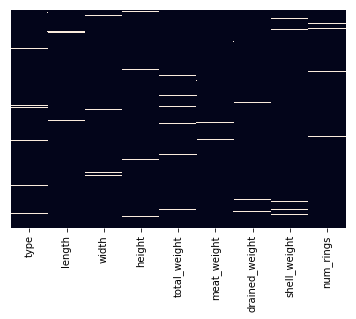

In [5]:
df=df.replace(-1, np.NaN)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Exercise 1.1

Compute the mean of all positive numbers of each numeric column and the counts of each category.

In [6]:
##################
#INSERT CODE HERE#
##################

df.mean()


type              0.953534
length            0.523692
width             0.407955
height            0.139610
total_weight      0.828843
meat_weight       0.359263
drained_weight    0.180249
shell_weight      0.238604
num_rings         9.921756
dtype: float64

### Exercise 1.2

Compute the median of all positive numbers of each numeric column.

In [7]:
##################
#INSERT CODE HERE#
##################

df.median()

type              1.00000
length            0.54500
width             0.42500
height            0.14000
total_weight      0.80175
meat_weight       0.33600
drained_weight    0.17050
shell_weight      0.23350
num_rings         9.00000
dtype: float64

### Exercise 1.3

Handle the missing values in a way that you find suitable. Argue your choices.

In [8]:
##################
#INSERT CODE HERE#
##################

#Percentage of null values
print(str(round(df.isnull().sum()/df.sum()*100,2)))

type               2.23
length             5.84
width              7.50
height            21.92
total_weight       3.14
meat_weight        8.59
drained_weight    14.87
shell_weight      10.49
num_rings          0.24
dtype: float64


In [25]:
df = df.drop("height", axis=1)

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


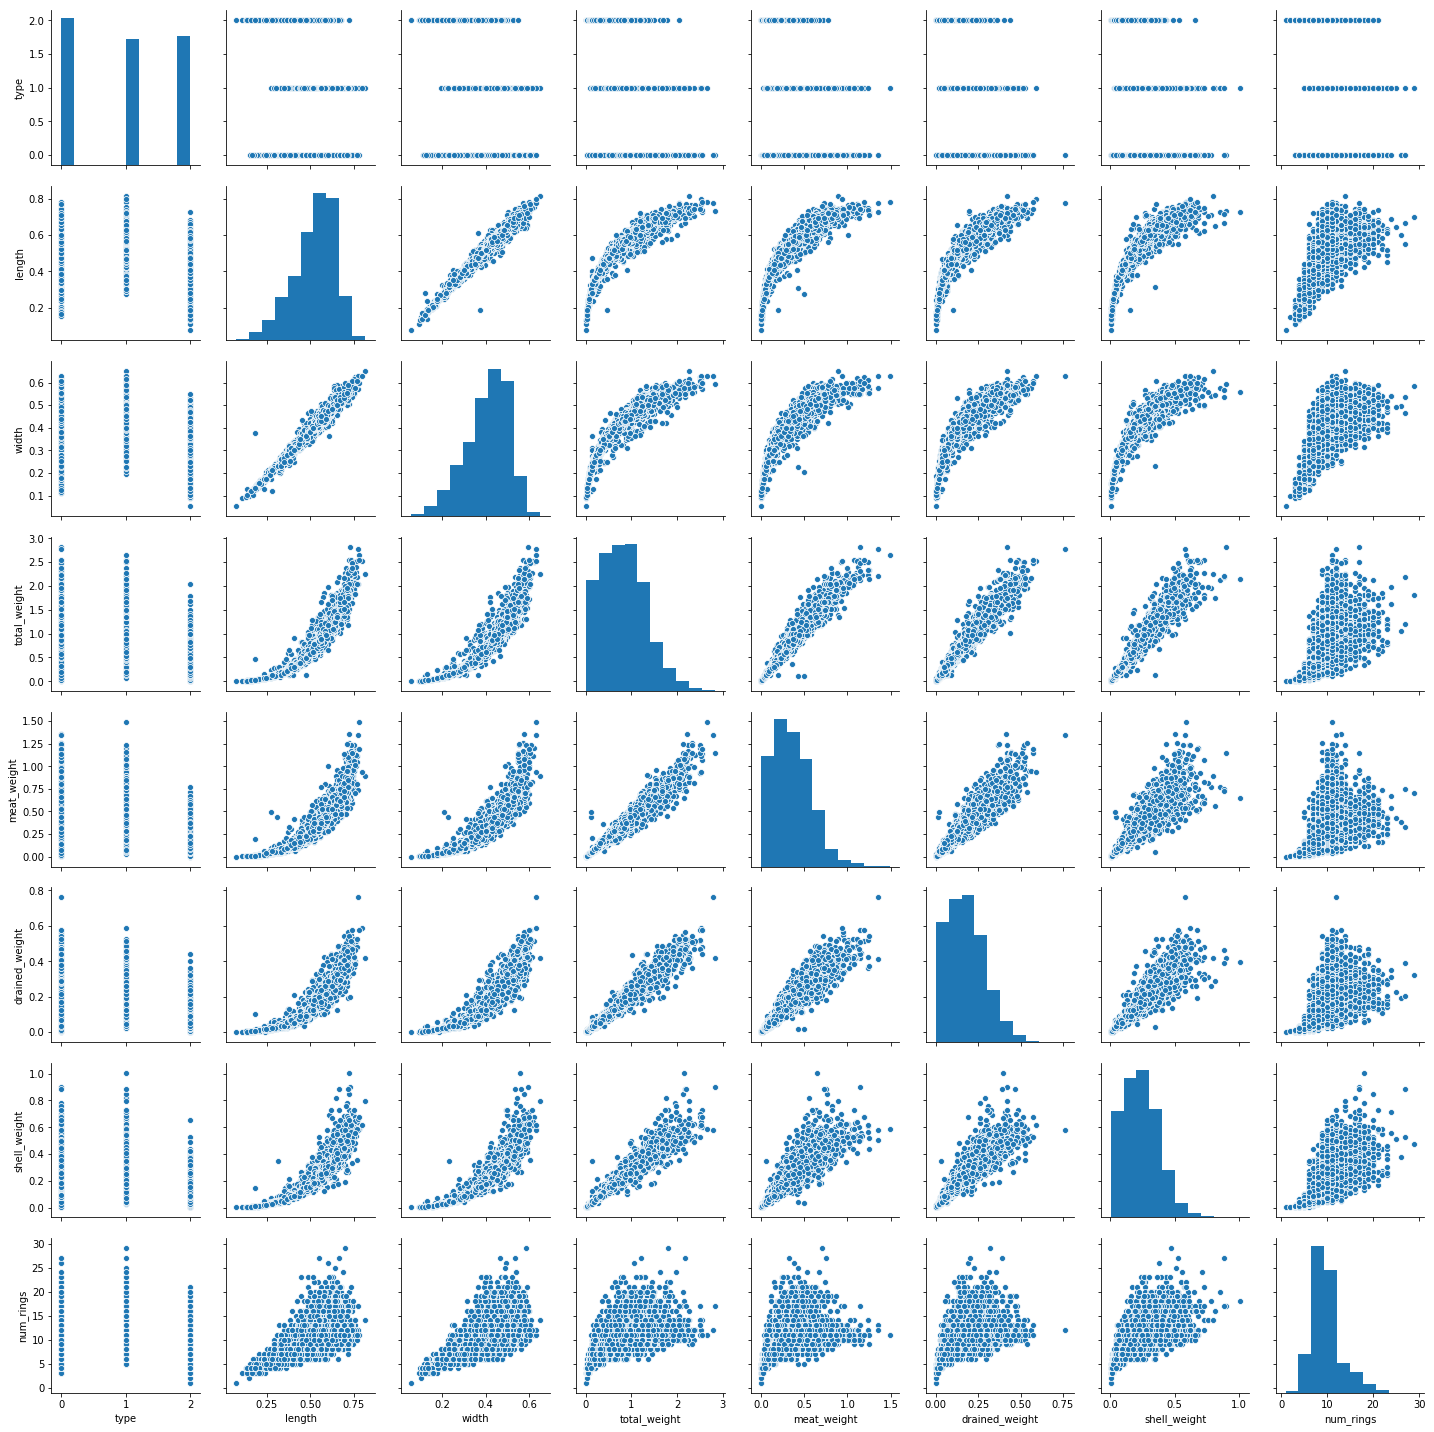

In [15]:
sns.pairplot(df)

In [60]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
transformed_values = imputer.fit_transform(df)
# count the number of NaN values in each column
newdf=pd.DataFrame(transformed_values,columns=['type','length','width','total_weight','meat_weight','drained_weight','shell_weight','num_rings'])

imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
transformed_values = imputer.fit_transform(df[['type']])
newdf['type']=pd.DataFrame(transformed_values,columns=['type'])

print(str(round(newdf.isnull().sum()/newdf.sum()*100,2)))


type              0.0
length            0.0
width             0.0
total_weight      0.0
meat_weight       0.0
drained_weight    0.0
shell_weight      0.0
num_rings         0.0
dtype: float64


In [61]:
df.groupby("type").size()


type
0.0    1500
1.0    1279
2.0    1310
dtype: int64

In [62]:
newdf.groupby("type").size()

type
0.0    1587
1.0    1279
2.0    1310
dtype: int64

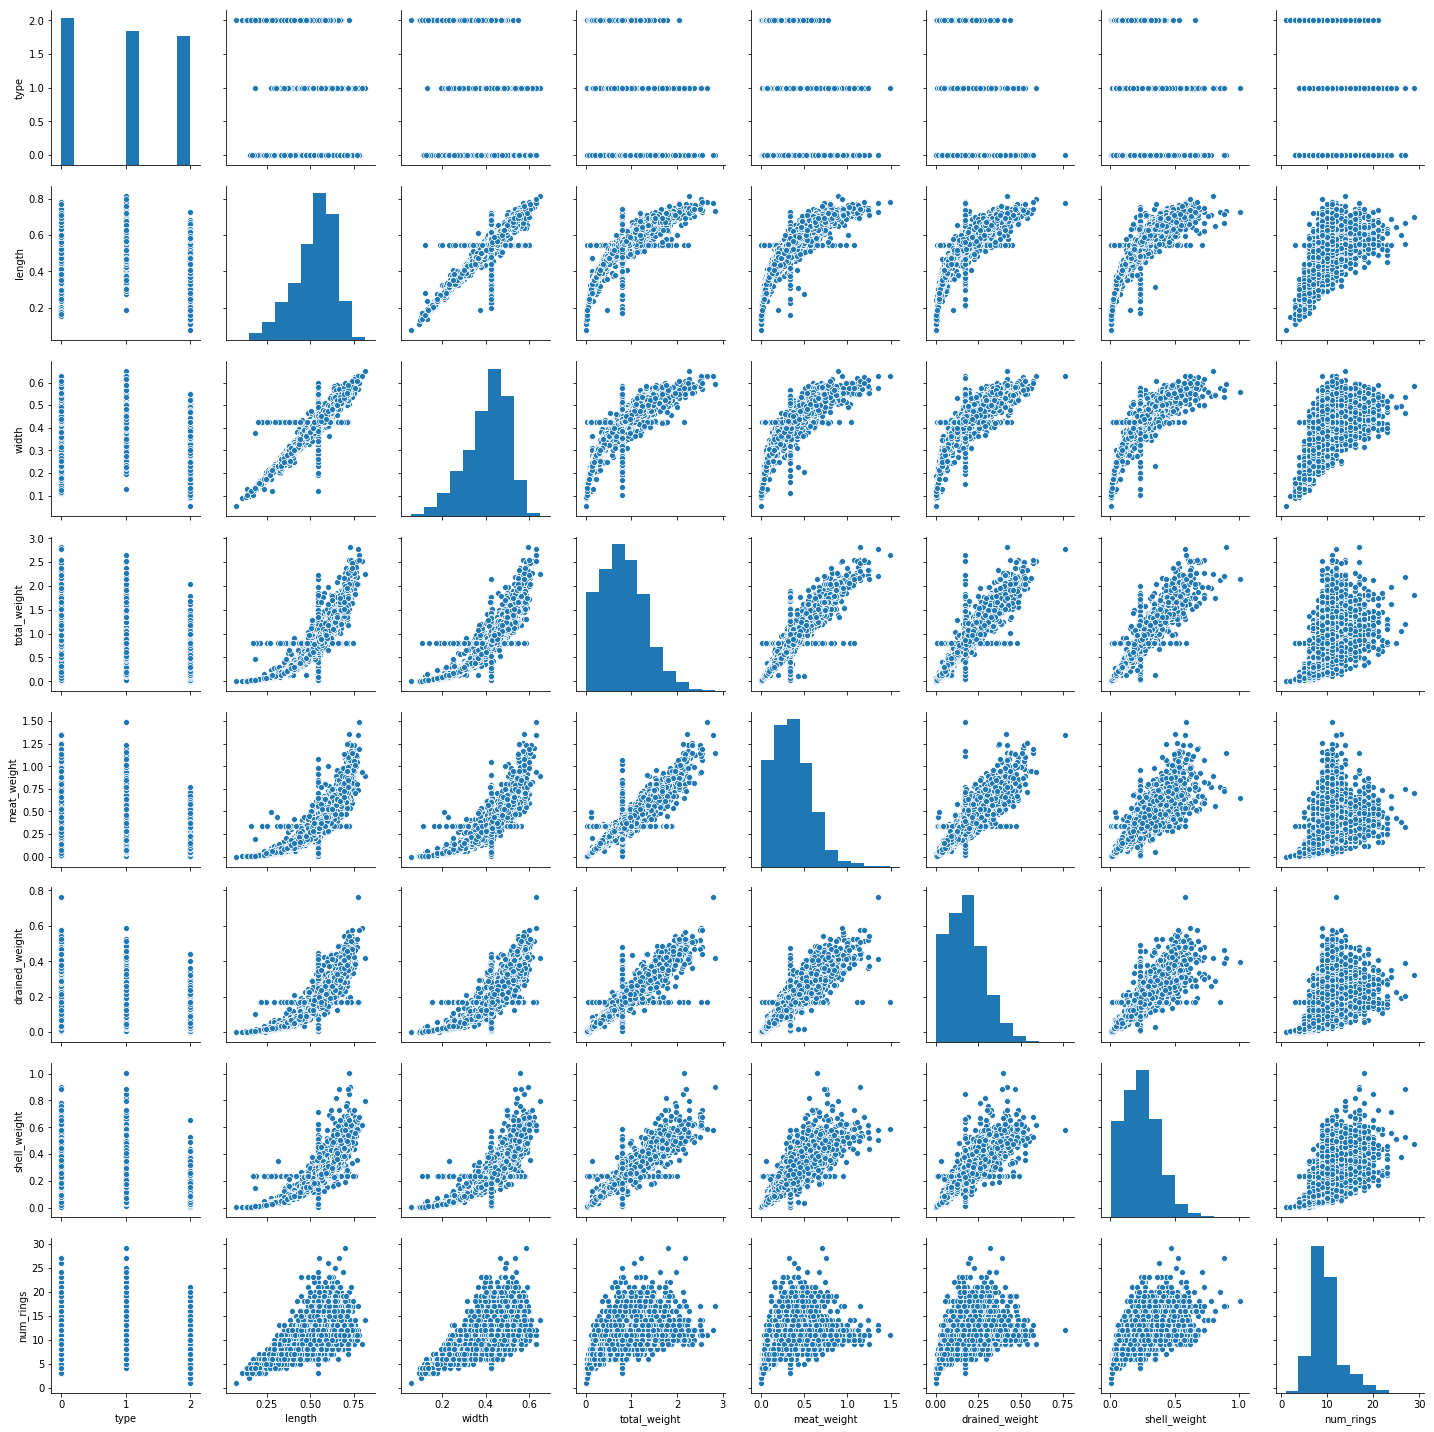

In [34]:
sns.pairplot(newdf)

### Exercise 1.4

Perform Z-score normalization on every column (except the type of course!)

In [43]:
##################
#INSERT CODE HERE#
##################

dfz=df
for cols in ['length','width','total_weight','meat_weight','drained_weight','shell_weight','num_rings'] :
    dfz[cols] = (newdf[cols] - newdf[cols].mean())/newdf[cols].std()
    
dfz.head()

,type,length,width,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0.0,-1.470582,-1.465932,-1.246610,-1.181457,-1.218637,-1.225995,-0.281919
1,1.0,0.047876,0.117904,-0.312669,-0.465468,-0.356749,-0.207242,-0.281919
2,0.0,-0.711353,-0.444102,-0.645702,-0.652446,-0.611608,-0.607466,0.031358
3,2.0,0.174414,-1.568115,-1.289014,-1.227062,-1.302046,-1.335147,-0.908474
4,2.0,-0.837891,-1.108292,-0.985975,-0.992199,-0.949876,-0.862155,-0.595197


## 2. Preprocessing text (Optional)

One possible way to transform text documents into vectors of numeric attributes is to use the TF-IDF representation. We will experiment with this representation using the 20 Newsgroup data set. The data set contains postings on 20 different topics. The classification problem is to decide which of the topics a posting falls into. Here, we will only consider postings about medicine and space.

In [2]:
from sklearn.datasets import fetch_20newsgroups


categories = ['sci.med', 'sci.space']
raw_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print('The index of each category is: {}'.format([(i,target) for i,target in enumerate(raw_data.target_names)]))

The index of each category is: [(0, 'sci.med'), (1, 'sci.space')]


In [3]:
raw_data.data[:2]

['From: flb@flb.optiplan.fi ("F.Baube[tm]")\nSubject: Vandalizing the sky\nX-Added: Forwarded by Space Digest\nOrganization: [via International Space University]\nOriginal-Sender: isu@VACATION.VENARI.CS.CMU.EDU\nDistribution: sci\nLines: 12\n\nFrom: "Phil G. Fraering" <pgf@srl03.cacs.usl.edu>\n> \n> Finally: this isn\'t the Bronze Age, [..]\n> please try to remember that there are more human activities than\n> those practiced by the Warrior Caste, the Farming Caste, and the\n> Priesthood.\n\nRight, the Profiting Caste is blessed by God, and may \n freely blare its presence in the evening twilight ..\n\n-- \n* Fred Baube (tm)\n',
 'From: geb@cs.pitt.edu (Gordon Banks)\nSubject: Re: Striato Nigral Degeneration\nReply-To: geb@cs.pitt.edu (Gordon Banks)\nOrganization: Univ. of Pittsburgh Computer Science\nLines: 16\n\nIn article <9303252134.AA09923@walrus.mvhs.edu> ktodd@walrus.mvhs.edu ((Ken Todd)) writes:\n>I would like any information available on this rare disease.  I understand\n>that

Check out some of the postings, might find some funny ones!

In [4]:
import numpy as np
idx = np.random.randint(0, len(raw_data.data))
print ('This is a {} email.\n'.format(raw_data.target_names[raw_data.target[idx]]))
print ('There are {} emails.\n'.format(len(raw_data.data)))
print(raw_data.data[idx])

This is a sci.space email.

There are 1187 emails.

From: n4hy@harder.ccr-p.ida.org (Bob McGwier)
Subject: Re: NAVSTAR positions
Organization: IDA Center for Communications Research
Lines: 11
Distribution: world
NNTP-Posting-Host: harder.ccr-p.ida.org
In-reply-to: Thomas.Enblom@eos.ericsson.se's message of 19 Apr 93 06:34:55 GMT


You have missed something.  There is a big difference between being in
the SAME PLANE and in exactly the same state (positions and velocities
equal).  IN addition to this, there has always been redundancies proposed.

Bob
--
------------------------------------------------------------------------------
Robert W. McGwier                  | n4hy@ccr-p.ida.org
Center for Communications Research | Interests: amateur radio, astronomy,golf
Princeton, N.J. 08520              | Asst Scoutmaster Troop 5700, Hightstown



Lets pick the first 10 postings from each category

In [5]:
idxs_med = np.flatnonzero(raw_data.target == 0)
idxs_space = np.flatnonzero(raw_data.target == 1)
idxs = np.concatenate([idxs_med[:10],idxs_space[:10]])
data = np.array(raw_data.data)
data = data[idxs]

<a href="http://www.nltk.org/">NLTK</a> is a toolkit for natural language processing. Take some time to install it and go through this <a href="http://www.slideshare.net/japerk/nltk-in-20-minutes">short tutorial/presentation</a>.

The downloaded package below is a tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [6]:
import nltk
import itertools
nltk.download('punkt')

# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in data]
vocabulary_size = 1000
unknown_token = 'unknown'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print ("Found %d unique words tokens." % len(word_freq.items()))

Found 1641 unique words tokens.


In [8]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print ("Using vocabulary size %d." % vocabulary_size)
print ("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))

Using vocabulary size 1000.
The least frequent word in our vocabulary is 'REASONS' and appeared 1 times.


In [14]:
word_to_index

{':': 0,
 '.': 1,
 ',': 2,
 '--': 3,
 '>': 4,
 'the': 5,
 ')': 6,
 'to': 7,
 '(': 8,
 'of': 9,
 '@': 10,
 'a': 11,
 'and': 12,
 'I': 13,
 'that': 14,
 'is': 15,
 'in': 16,
 'it': 17,
 'be': 18,
 '?': 19,
 'for': 20,
 '!': 21,
 'this': 22,
 "n't": 23,
 'are': 24,
 "'s": 25,
 'From': 26,
 'do': 27,
 'Subject': 28,
 'Organization': 29,
 'Lines': 30,
 "''": 31,
 'on': 32,
 'have': 33,
 'as': 34,
 'not': 35,
 '``': 36,
 'you': 37,
 'In': 38,
 'an': 39,
 'was': 40,
 'we': 41,
 'Re': 42,
 'The': 43,
 '-': 44,
 '<': 45,
 'would': 46,
 'if': 47,
 'o': 48,
 'writes': 49,
 'will': 50,
 'It': 51,
 'but': 52,
 'or': 53,
 'they': 54,
 'Space': 55,
 'article': 56,
 'may': 57,
 'with': 58,
 'food': 59,
 'by': 60,
 'what': 61,
 '...': 62,
 'see': 63,
 'like': 64,
 'should': 65,
 'can': 66,
 'there': 67,
 'some': 68,
 'about': 69,
 'at': 70,
 'know': 71,
 'up': 72,
 'who': 73,
 'Griffin': 74,
 'out': 75,
 'which': 76,
 'Is': 77,
 'diet': 78,
 'one': 79,
 'inflammation': 80,
 'used': 81,
 'stage': 82,
 '

### Exercise 2.1

Code your own TF-IDF representation function and use it on this dataset. (Don't use code from libraries. Build your own function with Numpy/Pandas). Use the formular TFIDF = TF * (IDF+1). The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored.

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names())

def tfidf(df):
    rep=df
    for cols in df.columns:
        #print(cols)
        
        #IDF= log_e(Total number of documents / Number of documents with term t in it)+1
        
        IDF=np.log(len(df[cols])/sum(df[cols].apply(lambda x: 1 if x>0 else 0)))+1
        
        #TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
        #But we already have TF as part of countVectorizer transform
        
        #TF-IDF=TF* IDF
        rep[cols]=list(map(lambda x : df[cols][x]*IDF, range(len(df[cols]))))
    return rep

rep = tfidf(df)

# Check if your implementation is correct
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, use_idf=True)
X_train = pd.DataFrame(vectorizer.fit_transform(data).toarray(), columns=countvec.get_feature_names())
answer=['No','Yes']
if rep is not None:
    print ('Is this implementation correct?\nAnswer: {}'.format(answer[1*np.all(X_train == rep)]))

Is this implementation correct?
Answer: Yes
